In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (12, 6)})

In [2]:
from data_cleaning import clean_data

In [ ]:

RAW_DATA_PATH = os.path.abspath(os.path.join("..", "data", "raw", "customer_churn.csv"))
PROCESSED_DIR = os.path.abspath(os.path.join("..", "data", "processed"))
CLEANED_DATA_PATH = os.path.join(PROCESSED_DIR, "cleaned_customer_churn.csv")
df_raw = pd.read_csv(RAW_DATA_PATH)
print(f"Raw data loaded: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")

Raw data loaded: 7043 rows, 21 columns


In [ ]:
df_clean = clean_data(df_raw)
print(f"Cleaned data: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")

Cleaned data: 7032 rows, 20 columns


In [ ]:
os.makedirs(PROCESSED_DIR, exist_ok=True)
df_clean.to_csv(CLEANED_DATA_PATH, index=False)
print(f"Cleaned data saved to: {CLEANED_DATA_PATH}")

Cleaned data saved to: c:\Users\renit\Desktop\customer-churn-case-study\data\processed\cleaned_customer_churn.csv


In [6]:
# ----------- EDA: Basic summaries -----------

print("\n--- Target Distribution ---")
print(df_clean['Churn'].value_counts(normalize=True))


--- Target Distribution ---
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


C:\Users\renit\AppData\Local\Temp\ipykernel_48140\1994701627.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_clean, palette='Set2')


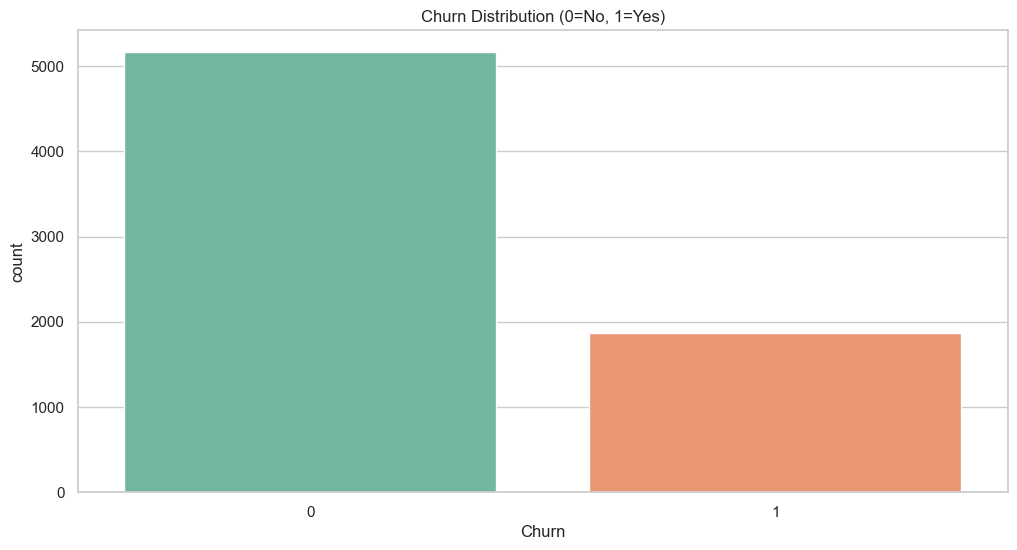

In [7]:
# ----------- EDA: Visualizations -----------

# 1. Churn count plot
plt.figure()
sns.countplot(x='Churn', data=df_clean, palette='Set2')
plt.title("Churn Distribution (0=No, 1=Yes)")
plt.show()

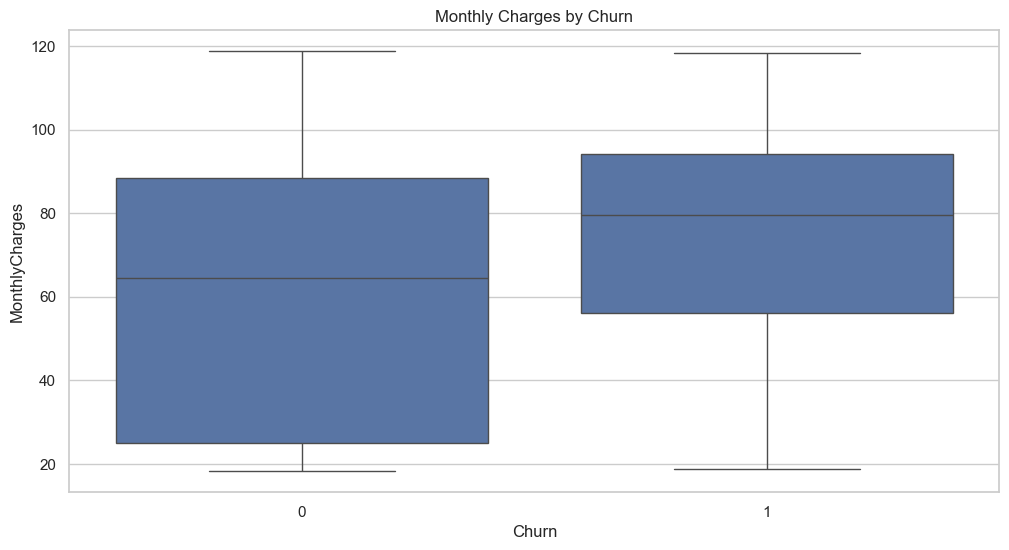

In [8]:
# 2. Monthly Charges distribution by churn
plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean)
plt.title("Monthly Charges by Churn")
plt.show()

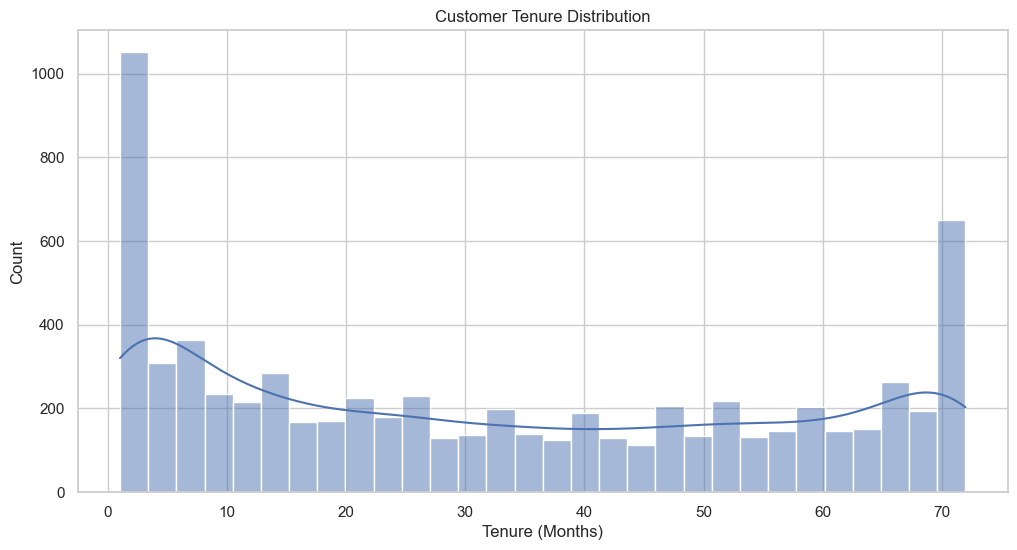

In [9]:
# 3. Tenure distribution
plt.figure()
sns.histplot(df_clean['tenure'], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.show()

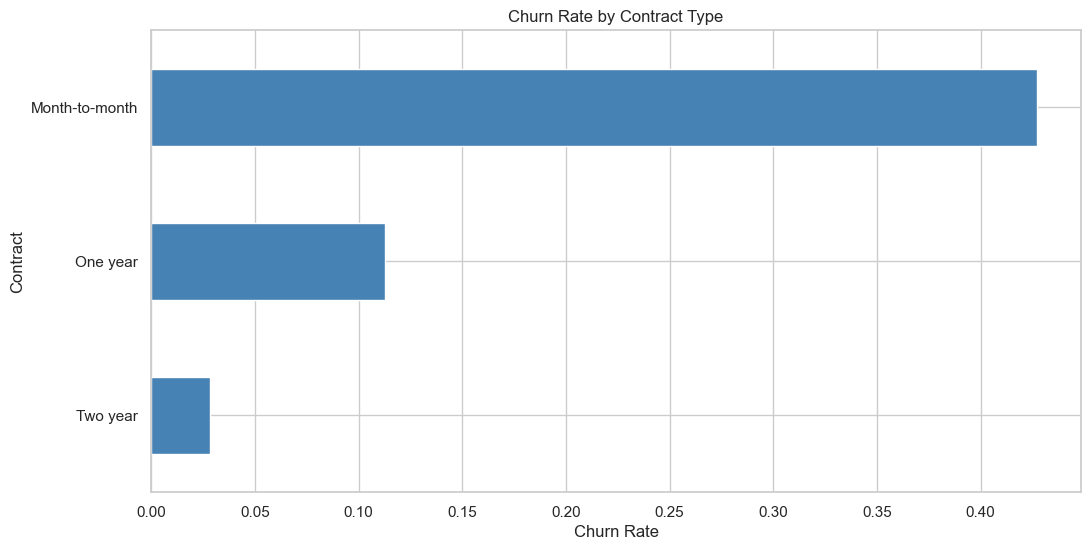

In [10]:
# 4. Churn rate by Contract type
if 'Contract' in df_clean.columns:
    plt.figure()
    churn_rates = df_clean.groupby('Contract')['Churn'].mean().sort_values()
    churn_rates.plot(kind='barh', color='steelblue')
    plt.title("Churn Rate by Contract Type")
    plt.xlabel("Churn Rate")
    plt.show()

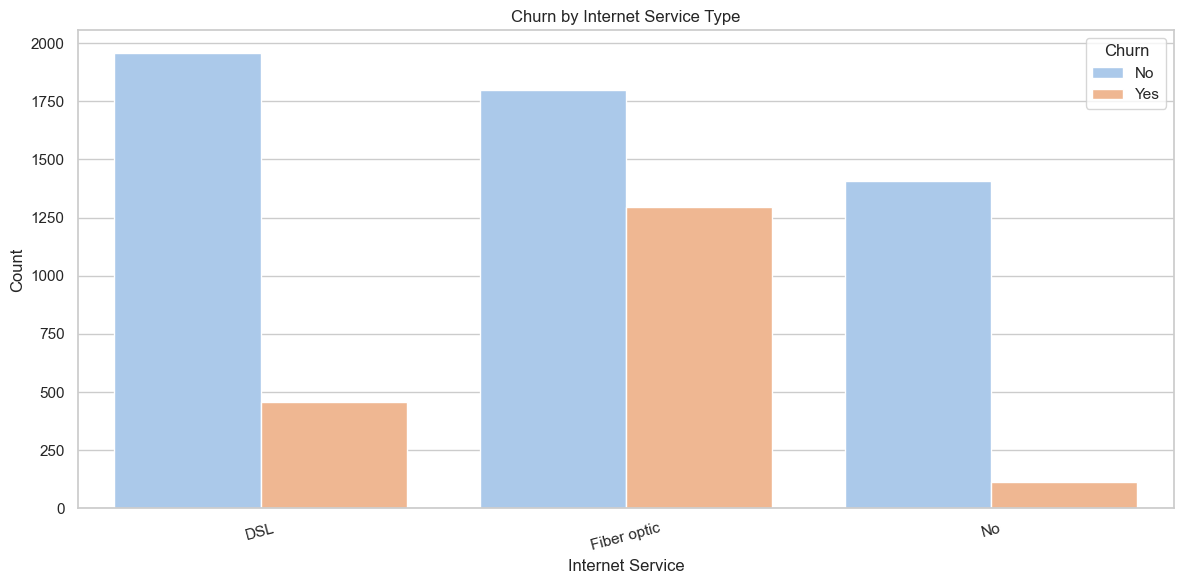

In [11]:
if 'InternetService' in df_clean.columns:
    plt.figure()
    sns.countplot(x='InternetService', hue='Churn', data=df_clean, palette='pastel')
    plt.title("Churn by Internet Service Type")
    plt.xlabel("Internet Service")
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


C:\Users\renit\AppData\Local\Temp\ipykernel_48140\619951872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=senior_churn.values, palette='Set2')


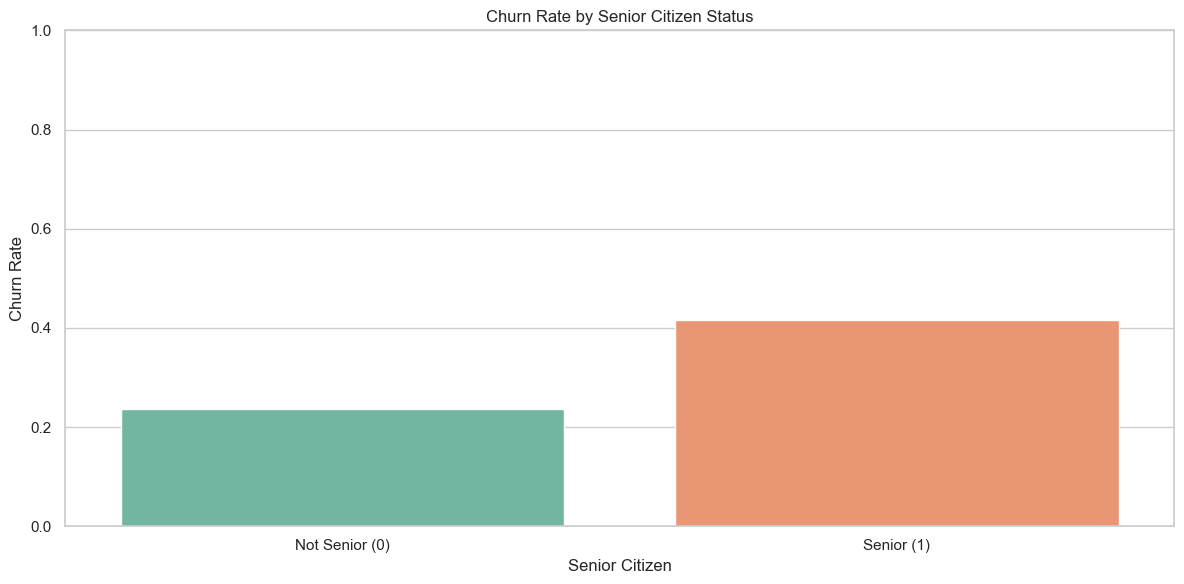

In [12]:
if 'SeniorCitizen' in df_clean.columns:
    senior_churn = df_clean.groupby('SeniorCitizen')['Churn'].mean()
    labels = ['Not Senior (0)', 'Senior (1)']
    plt.figure()
    sns.barplot(x=labels, y=senior_churn.values, palette='Set2')
    plt.title("Churn Rate by Senior Citizen Status")
    plt.ylabel("Churn Rate")
    plt.xlabel("Senior Citizen")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

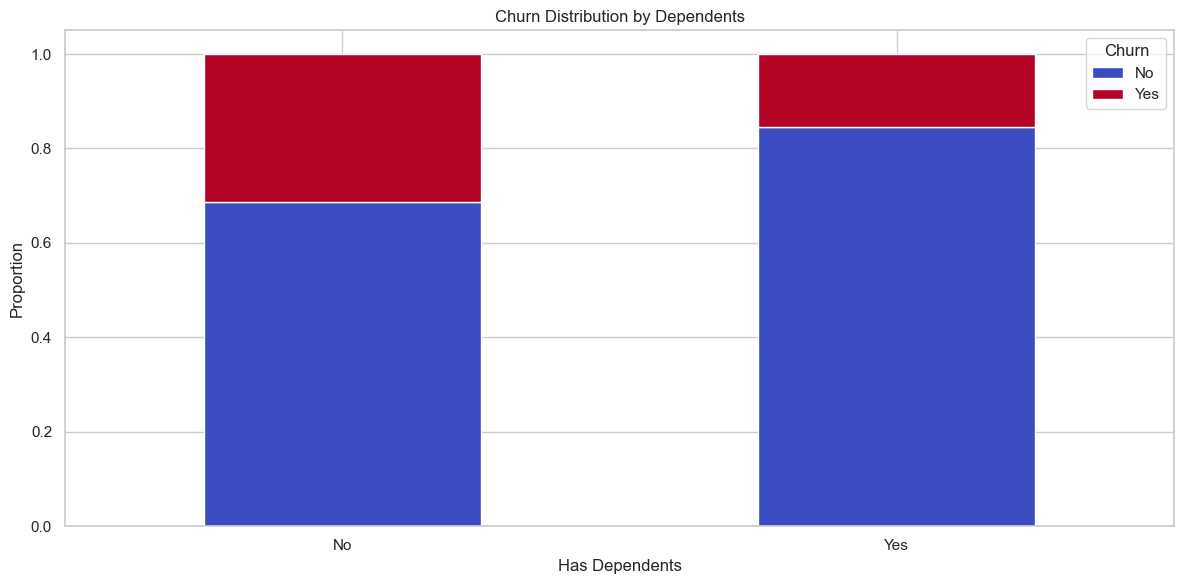

In [13]:
if 'Dependents' in df_clean.columns:
    dep_churn = pd.crosstab(df_clean['Dependents'], df_clean['Churn'], normalize='index')
    dep_churn.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title("Churn Distribution by Dependents")
    plt.xlabel("Has Dependents")
    plt.ylabel("Proportion")
    plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

C:\Users\renit\AppData\Local\Temp\ipykernel_48140\313541185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df_clean, palette='muted', inner='quart')


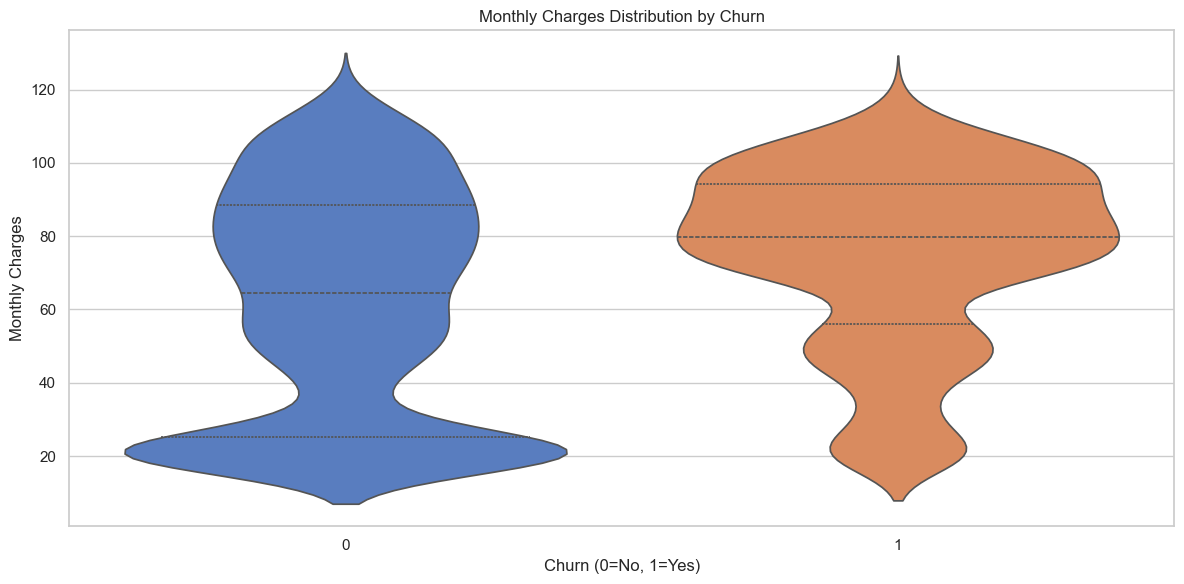

In [14]:
plt.figure()
sns.violinplot(x='Churn', y='MonthlyCharges', data=df_clean, palette='muted', inner='quart')
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Monthly Charges")
plt.tight_layout()
plt.show()